# Credit Card Fraud Detection

Credit card fraud is increasing considerably with the development of modern technology and the global superhighways of communication. Credit card fraud costs consumers and the financial companies billions of dollars annually, and fraudsters continuously try to find new rules and tactics to commit illegal actions.Credit Card is considered as a "nice target of fraud" since in a very short time attackers can get lots of money without much risk and most of the time the fraud is discovered after few days. To commit the credit card fraud either offline or online,fraudsters are looking for sensitive information such as credit card number, bank account and social security number. In case of offliine payment(which using credit card physically)to perform the fraudulent transactions, an attacker has to steal the credit card itself, while in the case of online payment(which occur over the internet or phone), the fraudsters should steal customer's identity. Thus, fraud detection becomes essential for banks and financial institution, to minimize their losses. The performance evaluation is performed on real life credit card transactions dataset to demonstrate the benefit of the bagging ensemble algorithm. 
Fraud Detection Methods are Logistic regression, Naïve bayes and other ensemble techniques such as Random Forest, Isolation-forest. Amongst all existing techniques ensemble learning methods are identified as popular and common method, not because of its quite straightforward implementation, but also due to its exceptional predictive performance on practical problems. After several trials and comparisons we introduced the bagging classifier based on decision tree, as the best classifier to construct the fraud detection model.  


##### Challenges in credit card fraud detection

Credit card fraud detectioin is one of the most explored domains of fraud detection and relies on the automatic analysis of recorded transactions to detect fraudulent behaviour. Further more the problem of credit card fraud detection has many constraints. here we discussed various challenges in credit card fraud detection.

1. Non-availability of real data-set : 
One of the biggest issues accociated with credit card fraud detectioin is the availability of dataset that researchers can perform the research.The main reason of unavailability of real world data is, banks and financial instituition are not ready to reveal their sensitive customer transaction data ddue to privacy reasons.

2. Unbalanced Data set : 
Credit card fraud datasets are highly skewed data(where many more of data is legitimate, and a few of them is fraudulent), and the legal and fraud transactions vary at least hundred times.Generally, in real case 98% of the transactions are legal while only 2% of them are fraud.

3. Size of the Data-set :
Millions of transactions are processed every day. Analyzing such enourmous amounts of transactions requires highly competent techniques that scale well, as well as requiring considerable computing power.It creates certain restrictions for the researchers.

4. Determining the appropriate evaluation parameters : 
There is very common measure for the fraud detection techniques which is false-positve rates. Accuracy is not a suitable metrices for credit card fraud detection technique since; the dataset is highly imbalanced.So it is important to study precision,sensibilty for each case and false rates for each datasets.



   

In [1]:
#Importing all the important Libraries.

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

%matplotlib inline

In [2]:
#Importing the dataset and creating the Dataframe called "df".
df = pd.read_csv('fraudTrain.csv',parse_dates=['trans_date_trans_time'])

##### Data-set Analysis

In [3]:
df.shape

(1296675, 23)

In [4]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


<AxesSubplot:xlabel='gender', ylabel='count'>

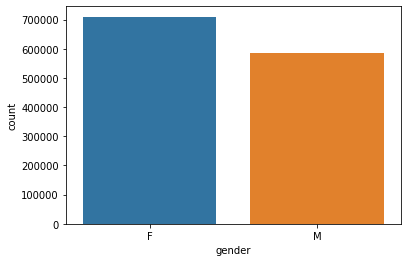

In [5]:
sns.countplot(x=df['gender'] ,data=df)

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

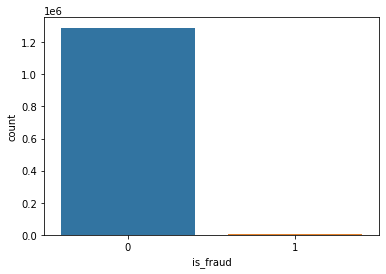

In [6]:
sns.countplot(x=df['is_fraud'] ,data=df)

In [7]:
df[df['is_fraud'] ==1].shape

(7506, 23)

In [8]:
df[df['is_fraud'] == 0].shape

(1289169, 23)

In [9]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
#Generating a new feature "hour" from the feature "trans_date_trans_time". 
#As the feature "trans_date_trans_time" is the time of transaction therefore it has to be converted into a quatitative value.

df['hour'] = df.trans_date_trans_time.dt.hour
df.drop('trans_date_trans_time','columns',inplace = True)
df = df[['cc_num','amt','hour','zip','lat','long','unix_time','merch_lat','merch_long','is_fraud']]

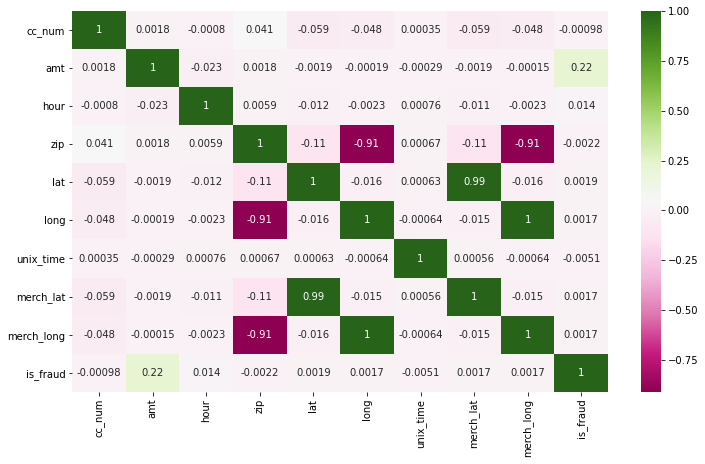

In [11]:
#Feature selection

mat = df.corr()
tp_crr = mat.index

plt.figure(figsize=(12,7))
g = sns.heatmap(df[tp_crr].corr(),annot=True,cmap="PiYG")

In [12]:
#Creating four different datasets.

df1 = df.sample(frac = 0.11,random_state = 1)
df2 = df.sample(frac = 0.12,random_state = 1)
df3 = df.sample(frac = 0.13,random_state = 1)
df4 = df.sample(frac = 0.14,random_state = 1)

x1 = df1[['cc_num','amt','hour','zip','lat','long','unix_time']]
y1 = df1[['is_fraud']]
x2 = df2[['cc_num','amt','hour','zip','lat','long','unix_time']]
y2 = df2[['is_fraud']]
x3 = df3[['cc_num','amt','hour','zip','lat','long','unix_time']]
y3 = df3[['is_fraud']]
x4 = df4[['cc_num','amt','hour','zip','lat','long','unix_time']]
y4 = df4[['is_fraud']]



In [13]:
#Feature Scaling.
#Function to scale the dataset.
def scaling(x1):
    scaler = preprocessing.StandardScaler().fit(x1)
    x_scaled = scaler.transform(x1)
    return  pd.DataFrame(x_scaled)

In [14]:
#Classifier generator functions

def Naive_B(x_train,y_train):
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=1)
    gnb = GaussianNB()
    gnb.fit(X_train,y_train.values.ravel())
    y_pred = gnb.predict(X_test)
    print(f"Accuracy :{accuracy_score(y_test,y_pred)}")
    print(f"Precision :{precision_score(y_test,y_pred)}")
    print(f"Confusion-matrix \n {confusion_matrix(y_test,y_pred)}")


def Random_forest(x_train,y_train):
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=1)
    cls = RandomForestClassifier()
    cls.fit(X_train,y_train.values.ravel())
    y_pred = pd.DataFrame(cls.predict(X_test))
    print(f"Accuracy :{accuracy_score(y_test,y_pred)}")
    print(f"Precision :{precision_score(y_test,y_pred)}")
    print(f"Confusion-matrix \n {confusion_matrix(y_test,y_pred)}")
    
    

    
def Logistic_R(x_train,y_train):
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=1)
    model4  = LogisticRegression()
    model4.fit(X_train,y_train.values.ravel())
    y_pred = pd.DataFrame(model4.predict(X_test))
    print(f"Accuracy :{accuracy_score(y_test,y_pred)}")
    print(f"Precision :{precision_score(y_test,y_pred)}")
    print(f"Confusion-matrix \n {confusion_matrix(y_test,y_pred)}")
      

In [15]:
x1 = scaling(x1)
x2 = scaling(x2)
x3 = scaling(x3)
x4 = scaling(x4)

In [16]:
#Calling Logistic_R function to generate a Logistic regression model with respective datasets and printing its measures such as
#accuracy, precision ,confusion matrix.

log = []
print("Logistic Regression Classifier results....................")
for i in range(1,5):
    if(i==1):
        print("D1 dataset result:")
        Logistic_R(x1,y1)
    if(i==2):
        print("D2 dataset result:")
        Logistic_R(x2,y2)
    if(i==3):
        print("D3 dataset result:")
        Logistic_R(x3,y3)
    if(i==4):
        print("D4 dataset result:")
        Logistic_R(x4,y4)
                
    print("\n")    
    log.append(1.0)
                 

Logistic Regression Classifier results....................
D1 dataset result:
Accuracy :0.9937539834289356
Precision :0.0
Confusion-matrix 
 [[46776    30]
 [  264     0]]


D2 dataset result:
Accuracy :0.9938265594266685
Precision :0.0
Confusion-matrix 
 [[51032    32]
 [  285     0]]


D3 dataset result:
Accuracy :0.993816063852736
Precision :0.0
Confusion-matrix 
 [[55284    26]
 [  318     0]]


D4 dataset result:
Accuracy :0.9935399869798187
Precision :0.0
Confusion-matrix 
 [[59520    27]
 [  360     0]]




In [17]:
#Calling Naive_B function to generate a Naive bayes model with respective datasets and printing its measures such as
#accuracy, precision ,confusion matrix.

print("Naive Bayes Classifier results....................")
for i in range(1,5):
    if(i==1):
        Naive_B(x1,y1)
    if(i==2):
        Naive_B(x2,y2)
    if(i==3):
        Naive_B(x3,y3)
    if(i==4):
        Naive_B(x4,y4)
                
    print("\n")
        
naive = []
naive.append(284/(284+125))
naive.append(335/(335+152))
naive.append(337/(337+158))
naive.append(337/(337+179))        

Naive Bayes Classifier results....................
Accuracy :0.9910133843212237
Precision :0.3056234718826406
Confusion-matrix 
 [[46522   284]
 [  139   125]]


Accuracy :0.990885898459561
Precision :0.31211498973305957
Confusion-matrix 
 [[50729   335]
 [  133   152]]


Accuracy :0.991065650391889
Precision :0.3191919191919192
Confusion-matrix 
 [[54973   337]
 [  160   158]]


Accuracy :0.9906855626220642
Precision :0.32194244604316546
Confusion-matrix 
 [[59170   377]
 [  181   179]]




In [18]:
#Calling Random Forest function to generate a  Random Forest Classifier with respective datasets and printing its measures such as
#accuracy, precision ,confusion matrix.

print("Random Forest Classifier results....................")
for i in range(1,5):
    if(i==1):
        Random_forest(x1,y1)
    if(i==2):
        Random_forest(x2,y2)
    if(i==3):
        Random_forest(x3,y3)
    if(i==4):
        Random_forest(x4,y4)
                
    print("\n")
        
rdf = []
rdf.append(23/(23+101))
rdf.append(29/(29+120))
rdf.append(21/(21+119))
rdf.append(38/(38+144))


Random Forest Classifier results....................
Accuracy :0.996218398130444
Precision :0.8467741935483871
Confusion-matrix 
 [[46787    19]
 [  159   105]]


Accuracy :0.9963582542990126
Precision :0.8141025641025641
Confusion-matrix 
 [[51035    29]
 [  158   127]]


Accuracy :0.9960271805565543
Precision :0.8391608391608392
Confusion-matrix 
 [[55287    23]
 [  198   120]]


Accuracy :0.9957600948136278
Precision :0.8045977011494253
Confusion-matrix 
 [[59513    34]
 [  220   140]]




In [19]:
d = ['df1','df2','df3','df4']

Text(0, 0.5, 'False positive rate')

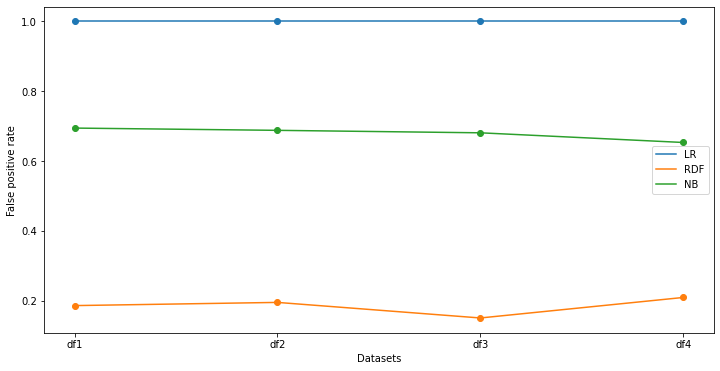

In [20]:
plt.figure(figsize = (12,6))
plt.scatter(x=d,y=log)
plt.scatter(x=d,y=rdf)
plt.scatter(x=d,y=naive)
plt.plot(d,log,label = "LR")
plt.plot(d,rdf,label = "RDF")
plt.plot(d,naive,label = "NB")
plt.legend()

plt.xlabel("Datasets")
plt.ylabel("False positive rate")

Conclusion

 A real-life dataset 
on credit card transactions is used for the evaluation. 
And it was founded that the Random-forest classifier 
works well with this kind of data since it is independent 
of attribute values.
The second feature of this technique in credit card fraud 
detection is its ability to handle class imbalance. More 
over it was found that it takes less time because fraud 
detection domain time is known which is one of the 
important parameter.